# **Data Science Salaries**


**Introducción:**

En el contexto empresarial de una consultora que ofrece servicios a diversas industrias, entre ellas finanzas y tecnología, surge la necesidad de comprender y optimizar diversos aspectos operativos. Este proyecto se centra en un objetivo estratégico clave: prever el tamaño de la empresa en el ámbito de Data Science. Este indicador se revela como esencial para la gestión de recursos humanos y la toma de decisiones relacionadas con la expansión y la adaptación a las demandas del mercado.

**Problema Empresarial:**

La empresa se encuentra actualmente inmersa en la tarea de comprender los factores que determinan el tamaño de la empresa en el ámbito de Data Science. La variabilidad en la estructura organizativa ha despertado el interés en identificar los elementos influyentes para tomar decisiones informadas y estratégicas. El problema empresarial consiste en desentrañar qué variables están impactando en el tamaño de la empresa y cómo la organización puede ajustar su enfoque para optimizar su posición en el mercado laboral.

**Contexto Analítico:**

En este contexto, se llevará a cabo un análisis de datos enfocado en recopilar información relevante para entender los determinantes del tamaño de la empresa en el campo de Data Science. Se explorarán variables como el nivel de experiencia de los empleados, la ubicación de la empresa, el porcentaje de trabajo remoto, el tipo de proyectos y, en un análisis adicional, también se considerarán los salarios de los profesionales. El objetivo final es proporcionar recomendaciones basadas en evidencia para ayudar a la empresa a adaptarse y crecer de manera eficiente en el mercado laboral de Data Science.

**Hipótesis:**

Se plantea la hipótesis de que el tamaño de la empresa en el ámbito de Data Science está influenciado por diversas variables clave. Entre estas, se anticipa que el nivel de experiencia de los empleados, la ubicación de la empresa, el porcentaje de trabajo remoto, la naturaleza de los proyectos y los salarios de los profesionales desempeñarán roles significativos en la determinación del tamaño organizativo.

*Nivel de Experiencia:* Se espera que el nivel de experiencia de los profesionales de Data Science incida en el crecimiento y tamaño de la empresa, considerando la contribución de habilidades especializadas.

*Ubicación de la Empresa:* Las diferencias geográficas podrían impactar en la expansión y alcance de la empresa, influyendo en su tamaño en el mercado laboral de Data Science.

*Porcentaje de Trabajo Remoto:* La flexibilidad laboral podría afectar la estructura organizativa, influenciando la capacidad de la empresa para crecer y adaptarse.

*Salarios de los Profesionales:* Los niveles salariales de los profesionales de Data Science también podrían estar relacionados con el tamaño de la empresa, siendo un factor que influye en su atractivo y capacidad para atraer y retener talento.


**Preguntas**

1 - ¿Como se comporta la experiencia de los empleados según el tamaño de la empresa?

2 - ¿Cuáles son los principales puestos en el área?

3 - ¿Cuál es la evolución del área en los últimos años?

4 - ¿Cuál es el lugar donde se ubican la mayoría de las empresas?

5 - ¿Dónde viven los empleados?


# **Librerías**

In [ ]:
!pip install matplotlib
!pip install mlxtend
!pip install scikit-learn
!pip install xgboost
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import lightgbm as lgb
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Data Wrangling**

In [ ]:
ruta_acceso = '/content/drive/MyDrive/Coder/Data Science/ds_salaries.csv'
df= pd.read_csv(ruta_acceso, delimiter=';', index_col='id')

In [ ]:
print(df)

      work_year experience_level employment_type                 job_title  \
id                                                                           
1          2023               SE              FT  Principal Data Scientist   
2          2023               MI              CT               ML Engineer   
3          2023               MI              CT               ML Engineer   
4          2023               SE              FT            Data Scientist   
5          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3751       2020               SE              FT            Data Scientist   
3752       2021               MI              FT  Principal Data Scientist   
3753       2020               EN              FT            Data Scientist   
3754       2020               EN              CT     Business Data Analyst   
3755       2021               SE              FT      Data Scien

In [ ]:
print("Estructura de dataframe:", df.shape)

Estructura de dataframe: (3755, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 1 to 3755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 352.0+ KB


**No tenemos datos nulos.**

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
moda_salarios = df['salary_in_usd'].mode()
print("La moda de los salarios en USD es:", moda_salarios)

La moda de los salarios en USD es: 0    100000
Name: salary_in_usd, dtype: int64


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
id,,,,,,,,,,,
1,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
3,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
4,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
5,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


**Le demos un vistazo al Df**

In [ ]:
df = df.drop_duplicates()

Eliminamos dupliacados

Renombrando y armando variables

In [ ]:
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

In [ ]:
df['experience_level']=df['experience_level'].replace("EN", "Junior")
df['experience_level']=df['experience_level'].replace("MI", "Intermediate")
df['experience_level']=df['experience_level'].replace("SE", "Senior")
df['experience_level']=df['experience_level'].replace("EX", "Executive")

In [ ]:
print(df['job_title'].nunique())

93


In [ ]:
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

In [ ]:
df['experience_score']=df['experience_level']
df['experience_score']=df['experience_score'].replace("EN", "1")
df['experience_score']=df['experience_score'].replace("MI", "2")
df['experience_score']=df['experience_score'].replace("SE", "3")
df['experience_score']=df['experience_score'].replace("EX", "4")

In [ ]:
print(df['employee_residence'].nunique())

78


In [ ]:
df['residence_continent']=df['employee_residence']

In [ ]:
df['residence_continent']=df['residence_continent'].replace(( 'AS', 'CA', 'CR', 'DO', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'PR', 'US'), "North America")
df['residence_continent']=df['residence_continent'].replace(('NG', 'GH', 'KE', 'ZA', 'DZ', 'EG', 'MA','TN','CF'), "Africa")
df['residence_continent']=df['residence_continent'].replace(('CN', 'HK', 'IN', 'IL', 'IR', 'IQ', 'JP', 'KW', 'KZ', 'MY', 'PH', 'PK', 'SA', 'SG', 'KR', 'AE', 'TH', 'TR', 'UZ', 'VN','AM','ID', ), "Asia")
df['residence_continent']=df['residence_continent'].replace(('AU', 'NZ','AS'), "Australia")
df['residence_continent']=df['residence_continent'].replace(('AL', 'AT', 'BE', 'BA', 'BG', 'HR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'GB', 'UA', 'RU', 'CY','MK','JE','MD'), "Europe")
df['residence_continent']=df['residence_continent'].replace(('AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'PY', 'PE', 'UY', 'VE'), "South America")

df['residence_continent'].unique()

array(['Europe', 'North America', 'Africa', 'Asia', 'Australia',
       'South America'], dtype=object)

In [ ]:
df['job_title_group']=df['job_title']
df['job_title_group']=df['job_title_group'].replace(('Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Data Science Lead', 'Lead Data Scientist', 'Staff Data Scientist', 'Data Scientist Lead', 'Principal Data Analyst', 'Principal Data Engineer'), "Científico de Datos (Data Scientist) y Roles Relacionados")
df['job_title_group']=df['job_title_group'].replace(('ML Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Research Engineer', 'Machine Learning Scientist', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer', 'Machine Learning Software Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Developer', 'Machine Learning Manager', 'Lead Machine Learning Engineer'), "Ingeniería de Machine Learning")
df['job_title_group']=df['job_title_group'].replace(('Data Analyst', 'Data Modeler', 'Analytics Engineer', 'Business Intelligence Engineer', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'BI Developer', 'Cloud Data Engineer', 'ETL Developer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer', 'Data Operations Engineer', 'Data Operations Analyst'), "Ingeniería de Datos y Desarrollo")
df['job_title_group']=df['job_title_group'].replace(('Data Strategist', 'Data Analytics Manager', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Director of Data Science', 'Data Lead', 'Manager Data Management', 'Head of Machine Learning', 'Head of Data Science', 'Principal Data Architect'), "Gestión y Estrategia de Datos")



In [ ]:
df['job_title_group']=df['job_title_group'].replace(('BI Analyst', 'Research Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'AI Developer', 'Applied Data Scientist', 'Staff Data Analyst', 'BI Data Engineer', 'AI Scientist', 'Financial Data Analyst', 'Deep Learning Researcher', 'Data Science Consultant', 'Data Analytics Specialist', 'BI Data Analyst', 'Insight Analyst', 'Deep Learning Engineer', 'Product Data Analyst', 'Computer Vision Software Engineer', 'Azure Data Engineer', 'Marketing Data Engineer', 'Data Analytics Lead', 'Data Science Engineer', 'NLP Engineer', '3D Computer Vision Researcher', 'Data Analytics Engineer', 'Data Analytics Consultant', 'Data Management Specialist', 'Data Science Tech Lead', 'Marketing Data Analyst', 'Power BI Developer', 'Product Data Scientist', 'Finance Data Analyst'), "Científico de Datos (Data Scientist) y Roles Relacionados")


In [ ]:
df['job_title_group']=df['job_title_group'].replace(('Computer Vision Engineer', 'AI Scientist', 'Deep Learning Researcher', 'Autonomous Vehicle Technician', 'AI Programmer', 'Deep Learning Engineer', 'Computer Vision Software Engineer', 'NLP Engineer', '3D Computer Vision Researcher'), "Ingeniería de Machine Learning")


In [ ]:
df['job_title_group']=df['job_title_group'].replace(('Business Data Analyst', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'MLOps Engineer', 'Big Data Architect', 'Azure Data Engineer', 'Marketing Data Engineer', 'Data Analytics Lead', 'Data Science Engineer', 'Data Analytics Engineer'), "Ingeniería de Datos y Desarrollo")


In [ ]:
df['job_title_group']=df['job_title_group'].replace(('Data Management Specialist', 'Data Science Tech Lead'), "Gestión y Estrategia de Datos")

In [ ]:
df['companyloc_continent']=df['company_location']

df['companyloc_continent']=df['companyloc_continent'].replace(( 'AS', 'CA', 'CR', 'DO', 'SV', 'GT', 'HN', 'MX', 'NI', 'PA', 'PR', 'US', 'BS'), "North America")
df['companyloc_continent']=df['companyloc_continent'].replace(('NG', 'GH', 'KE', 'ZA', 'DZ', 'EG', 'MA','TN','CF'), "Africa")
df['companyloc_continent']=df['companyloc_continent'].replace(('CN', 'HK', 'IN', 'IL', 'IR', 'IQ', 'JP', 'KW', 'KZ', 'MY', 'PH', 'PK', 'SA', 'SG', 'KR', 'AE', 'TH', 'TR', 'UZ', 'VN','AM','ID', ), "Asia")
df['companyloc_continent']=df['companyloc_continent'].replace(('AU', 'NZ','AS'), "Australia")
df['companyloc_continent']=df['companyloc_continent'].replace(('AL', 'AT', 'BE', 'BA', 'BG', 'HR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'GB', 'UA', 'RU', 'CY','MK','JE','MD'), "Europe")
df['companyloc_continent']=df['companyloc_continent'].replace(('AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'PY', 'PE', 'UY', 'VE'), "South America")

In [ ]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['residence_continent'].unique())
print(df['companyloc_continent'].unique())
print(df['job_title_group'].unique())

['Senior' 'Intermediate' 'Junior' 'Executive']
['Full-time' 'Contractual' 'Freelancer' 'Part-time']
['Europe' 'North America' 'Africa' 'Asia' 'Australia' 'South America']
['Europe' 'North America' 'Africa' 'Asia' 'South America' 'Australia']
['Científico de Datos (Data Scientist) y Roles Relacionados'
 'Ingeniería de Machine Learning' 'Ingeniería de Datos y Desarrollo'
 'Gestión y Estrategia de Datos']


In [ ]:
df['remote_ratio']=df['remote_ratio'].replace(100, "Fully Remote")
df['remote_ratio']=df['remote_ratio'].replace(50, "Partially Remote")
df['remote_ratio']=df['remote_ratio'].replace(0, "No Remote Work")


In [ ]:
# Elimino 2 columnas que no voy a usar
columnas_a_eliminar = ['salary', 'salary_currency']
df = df.drop(columnas_a_eliminar, axis=1)


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_score,residence_continent,job_title_group,companyloc_continent
id,,,,,,,,,,,,,
1,2023,Senior,Full-time,Principal Data Scientist,85847,ES,Fully Remote,ES,Large,Senior,Europe,Científico de Datos (Data Scientist) y Roles R...,Europe
2,2023,Intermediate,Contractual,ML Engineer,30000,US,Fully Remote,US,Small,Intermediate,North America,Ingeniería de Machine Learning,North America
3,2023,Intermediate,Contractual,ML Engineer,25500,US,Fully Remote,US,Small,Intermediate,North America,Ingeniería de Machine Learning,North America
4,2023,Senior,Full-time,Data Scientist,175000,CA,Fully Remote,CA,Medium,Senior,North America,Científico de Datos (Data Scientist) y Roles R...,North America
5,2023,Senior,Full-time,Data Scientist,120000,CA,Fully Remote,CA,Medium,Senior,North America,Científico de Datos (Data Scientist) y Roles R...,North America


Varabiales Data set:

*   **Id :** Id personas.
*   **work_year**: Año que trabajo.
*   **employment_type	:** Tipo de empleo [Full-time, Contractual, Freelancer, o Part-time].
*   **job_title	:** Puesto.
*   **salary_in_usd	:** Salario en dolares.
*   **employee_residence:** Residencia del empleador.
*   **remote_ratio:** Porcentaje de trabajo remoto.
*   **company_location:** Ubicacion de la empresa.
*   **company_size:**	Tamaño de la empresa.
*   **experience_score:** Experiencia del empleado
*   **residence_continent:** Continente en el que vive el empleado
*   **companyloc_continent:** Continente en el que esta el empleador

*    **Medidas:** salary_in_usd

*   **Dimensiones:** Id, work_year, employment_type, job_title, employee_residence, remote_ratio, company_location, company_size	experience_score, residence_continent, companyloc_continent

# **Análisis Exploratorio**

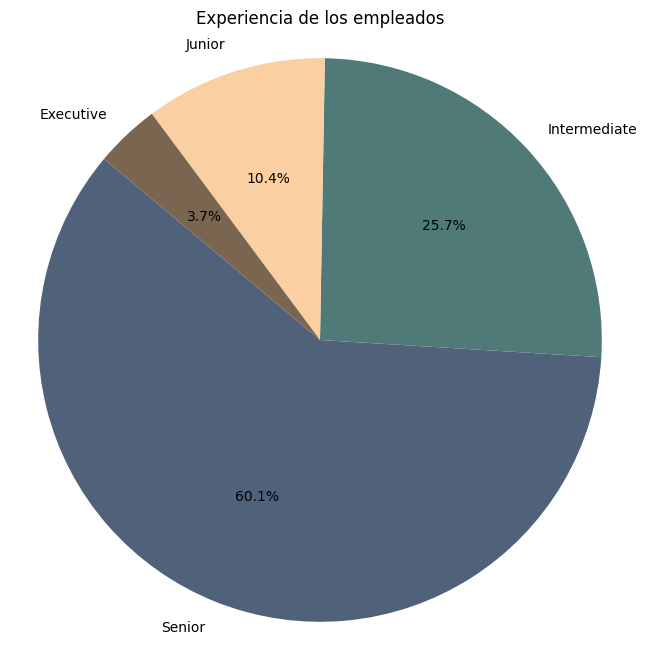

In [ ]:
experiencia_de_emepleado = df['experience_level'].value_counts()
custom_colors = ["#50617A", "#507A78", "#FAD0A2", "#7A6650"]
plt.figure(figsize=(8, 8))
plt.pie(experiencia_de_emepleado, labels=experiencia_de_emepleado.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

plt.title('Experiencia de los empleados')
plt.axis('equal')


plt.show()

**Casi 2/3 del mercado es Senior. El porcentaje de los Juniors es preocupante.**

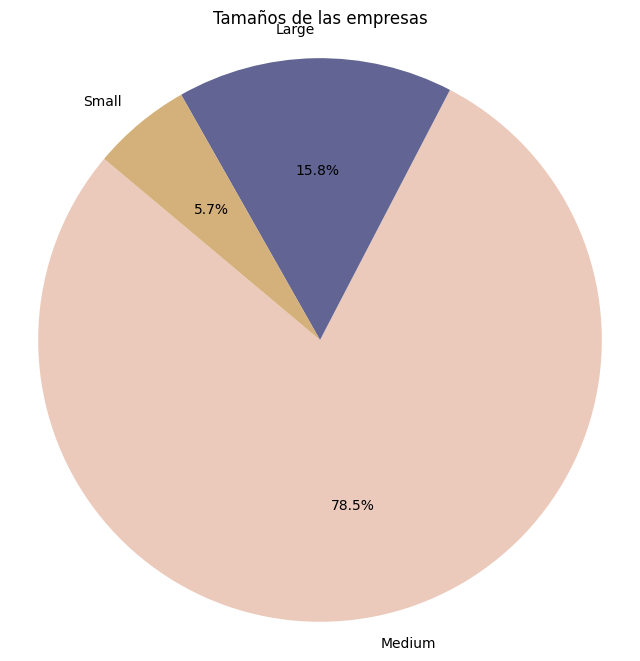

In [ ]:
tamaniodelaenmpresa = df['company_size'].value_counts()
colores_personalizados = ['#EBCABC', '#626593', '#D4B07A']
plt.figure(figsize=(8, 8))
plt.pie(tamaniodelaenmpresa, labels=tamaniodelaenmpresa.index, autopct='%1.1f%%', startangle=140, colors=colores_personalizados)
plt.title('Tamaños de las empresas')
plt.axis('equal')
plt.show()

**La gran mayoría de las empresas son de tamaño medio.**








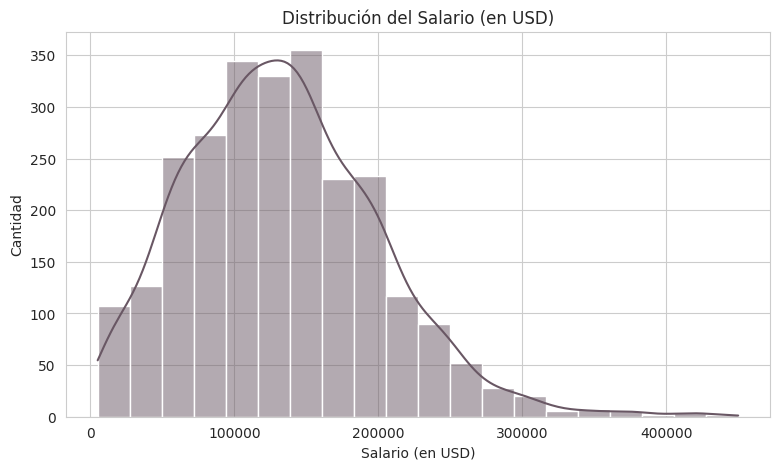

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, bins=20, color="#695764")
plt.title('Distribución del Salario (en USD)')
plt.xlabel('Salario (en USD)')
plt.ylabel('Cantidad')
plt.show()

**Distribución del salario en general. La variable es continua. La cola larga a la derecha no se ajusta a una distribución normal. Esto significa que hay algunos trabajadores que ganan mucho más que la mayoría. Como ya habiamos visto en el describe, la media y la mediana se ubican proximos a los USD 135.000**

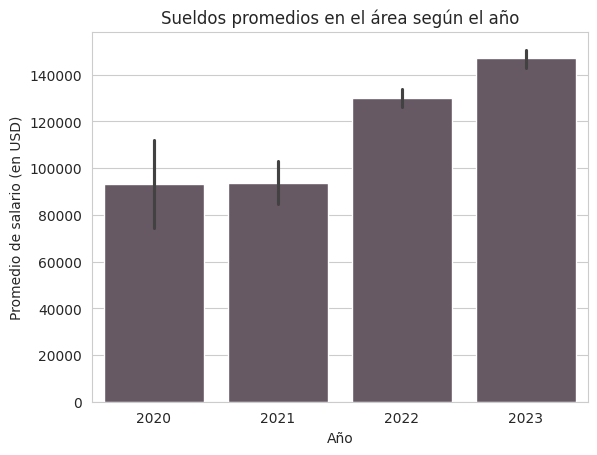

In [ ]:
ax = sns.barplot(x="work_year", y="salary_in_usd", data=df, color="#695764")
plt.title("Sueldos promedios en el área según el año")
plt.xlabel('Año')
plt.ylabel('Promedio de salario (en USD)')
plt.show()

**Hay un fuerte incremento de los promedios de los sueldos en los 2 últimos años.**

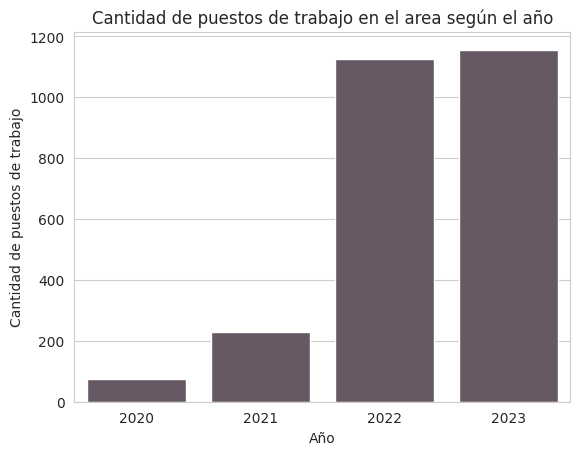

In [ ]:
sns.countplot(data=df, x='work_year', color="#695764")
plt.title('Cantidad de puestos de trabajo en el area según el año')
plt.xlabel('Año')
plt.ylabel('Cantidad de puestos de trabajo')


plt.show()

**El gráfico muestra un fuerte incremento en el número de puestos de trabajo en el área en los últimos dos años. Indicaría que hay una demanda de estos puestos y que las empresas están contratando. Podía indicar que hay más oportunidades de empleo.**

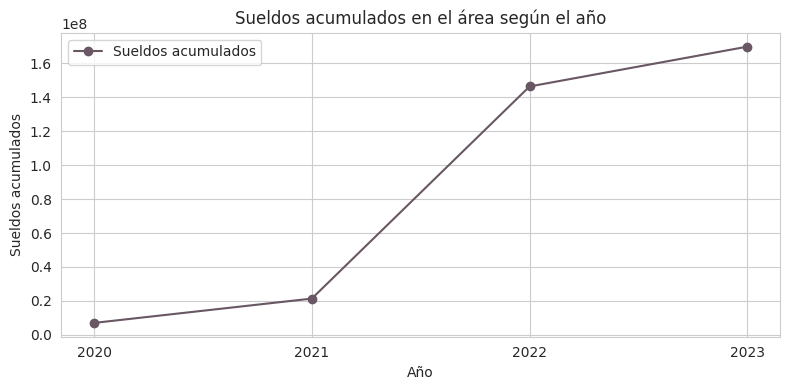

In [ ]:
fig, subplot_1 = plt.subplots(figsize=(8, 4))
salario_acumulado = df.groupby('work_year')['salary_in_usd'].sum()
subplot_1.plot(salario_acumulado.index, salario_acumulado.values, color="#695764", label="Sueldos acumulados", marker='o')
subplot_1.set_xlabel('Año')
subplot_1.set_ylabel('Sueldos acumulados')
subplot_1.set_title('Sueldos acumulados en el área según el año')
subplot_1.legend()
subplot_1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

**Esto muestra claramente la evolución de la inversión en área en los últimos años. Junto Con el grafico anterior, contesta la tercera pregunta. (3 - ¿Cual es la evolución del área en los últimos años?).**

In [ ]:
print (salario_acumulado)

work_year
2020      7001507
2021     21349324
2022    146448798
2023    169929951
Name: salary_in_usd, dtype: int64


**El crecimiento del área es notorio en los últimos años.**



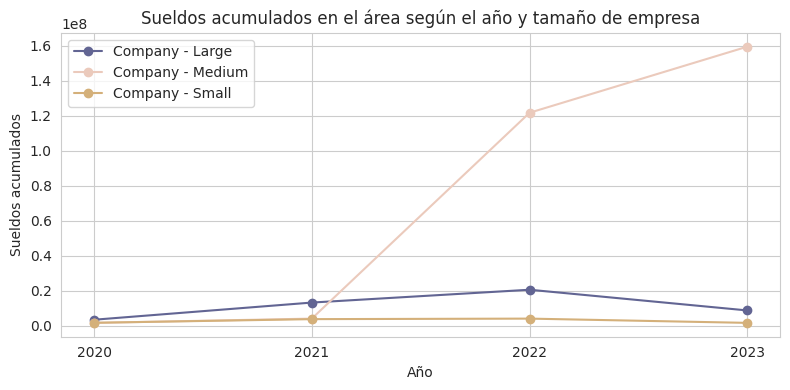

In [ ]:
colores_personalizados = ['#626593', '#EBCABC', '#D4B07A']

salario_acumulado_por_tamano = df.groupby(['work_year', 'company_size'])['salary_in_usd'].sum().unstack()

fig, subplot_1 = plt.subplots(figsize=(8, 4))

for i, tamano in enumerate(salario_acumulado_por_tamano.columns):
    subplot_1.plot(salario_acumulado_por_tamano.index, salario_acumulado_por_tamano[tamano], label=f"Company - {tamano}", marker='o', color=colores_personalizados[i])

subplot_1.set_xlabel('Año')
subplot_1.set_ylabel('Sueldos acumulados')
subplot_1.set_title('Sueldos acumulados en el área según el año y tamaño de empresa')
subplot_1.legend()
subplot_1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

**Esto muestar que el incremento se da sobre todo en empresas medianas.**

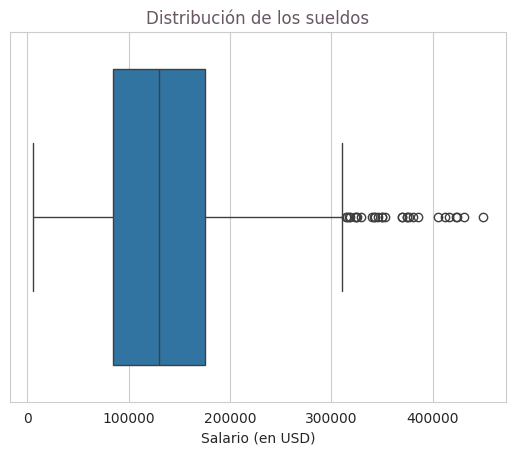

In [ ]:
ax = sns.boxplot(x=df["salary_in_usd"])
plt.title("Distribución de los sueldos", color="#695764")
ax.set_xlabel("Salario (en USD)")
plt.show()

**En estre grafico de caja y bigotes sobre el salario, observamos que tenemos muchos datos atipiscos.**

Text(0.5, 1.0, 'Ubicacion del empleador segun año')

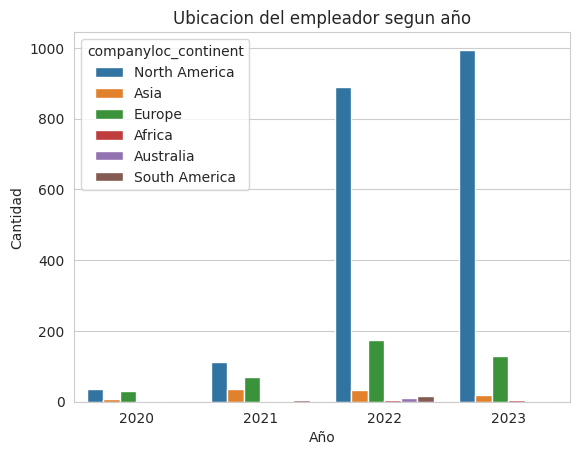

In [ ]:
g = sns.countplot(data=df, x="work_year", hue="companyloc_continent")
g.set_xlabel("Año")
g.set_ylabel("Cantidad")
plt.title("Ubicacion del empleador segun año")

**El crecimiento del área se sostiene sobre todo por el crecimiento en el mercado en Norte América. Esto contesta la cuarta pregunta (4 - ¿Cual es el lugar donde se ubican la mayoria de las emprresas?)**

Text(0.5, 1.0, 'Ubicacion donde vive el empleado según el año')

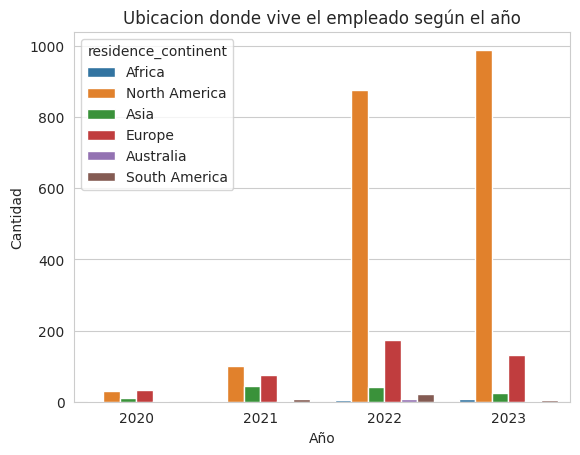

In [ ]:
g1 = sns.countplot(data=df, x="work_year", hue="residence_continent")
g1.set_xlabel("Año")
g1.set_ylabel("Cantidad")
plt.title("Ubicacion donde vive el empleado según el año")

**Muchos empleados viviendo en Norte America. Esto contesta la cuarta pregunta
(5 - ¿Donde viven los empleados?)**

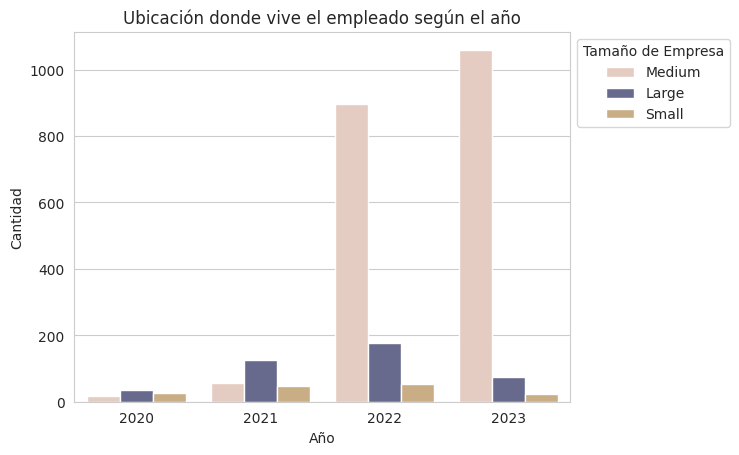

In [ ]:
colores_personalizados = ['#EBCABC', '#626593', '#D4B07A']
g1 = sns.countplot(data=df, x="work_year", hue="company_size", palette=colores_personalizados)

g1.set_xlabel("Año")
g1.set_ylabel("Cantidad")
plt.title("Ubicación donde vive el empleado según el año")
plt.legend(title="Tamaño de Empresa", bbox_to_anchor=(1, 1))

plt.show()


**La evolucion se ve claramente en empresas medianas.**

Text(0.5, 1.0, 'Salario según año y Experiancia Laboral')

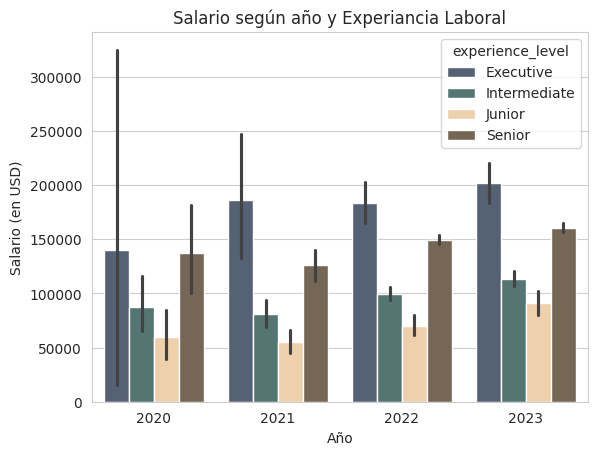

In [ ]:
custom_colors = ["#50617A", "#507A78", "#FAD0A2", "#7A6650"]
g = sns.barplot(x="work_year", y="salary_in_usd", hue="experience_level", data=df, palette=custom_colors)
g.set_xlabel("Año")
g.set_ylabel("Salario (en USD)")
plt.title("Salario según año y Experiancia Laboral")

**La distribución de los sueldos por experiencia no presenta datos ilógicos.**

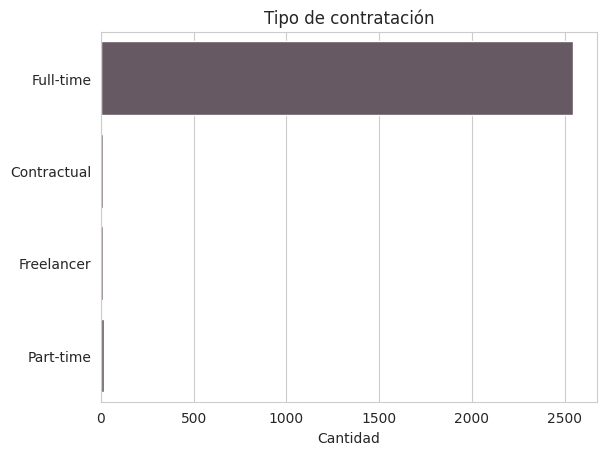

In [ ]:
g = sns.countplot(y=df.employment_type, color="#695764")
g.set_xlabel("Cantidad")
plt.title('Tipo de contratación')
plt.ylabel(None);

**La mayoría de los sueldos son full time. A lo que creo que debería borrar los demás para no tener datos que distorsionen.**

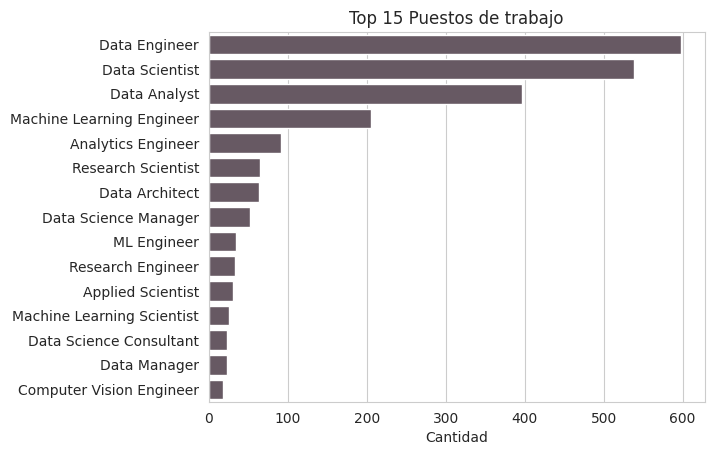

In [ ]:
top15_job_titles = df.job_title.value_counts()[:15]
g = sns.barplot(x=top15_job_titles.values, y=top15_job_titles.index, color="#695764")
g.set_xlabel("Cantidad")
plt.title('Top 15 Puestos de trabajo')
plt.ylabel(None);

**Los primeros 4 puestos son los que más representa las tareas realizadas en el área. Esto contesta la segunda pregunta planteada (2 - ¿Cuales son los principales puestos en el área?)**

Text(0.5, 1.0, 'Puestos agrupados por  responsabilidades, habilidades y funciones asociadas')

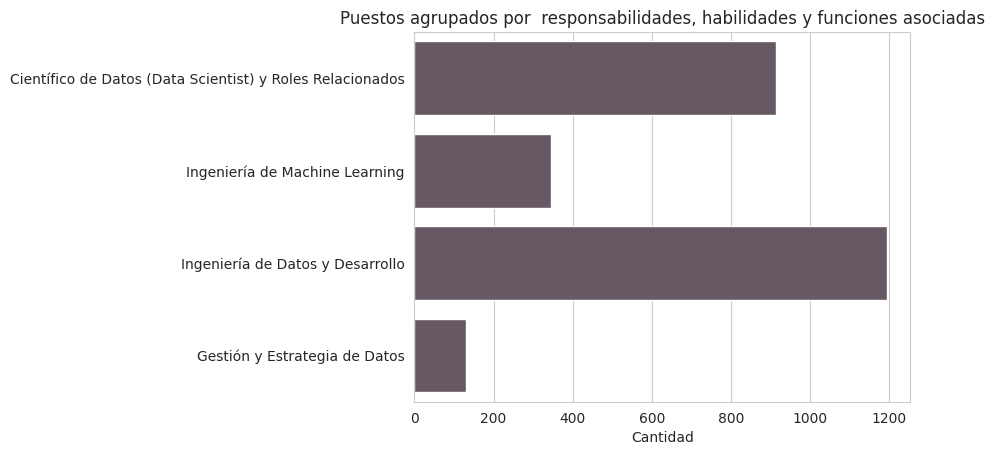

In [ ]:
g= sns.countplot(y=df.job_title_group, color="#695764")
g.set_xlabel("Cantidad")
plt.ylabel(None)
plt.title('Puestos agrupados por  responsabilidades, habilidades y funciones asociadas')


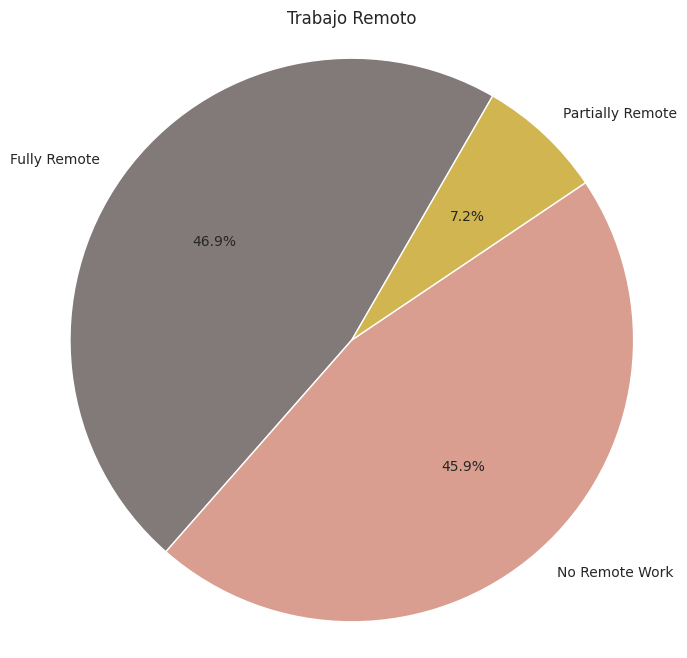

In [ ]:
ratio_de_trabajo_remoto = df['remote_ratio'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(ratio_de_trabajo_remoto, labels=ratio_de_trabajo_remoto.index, autopct='%1.1f%%', startangle=60, colors=['#827A78', '#D99E90', '#D1B550'])

plt.title('Trabajo Remoto')
plt.axis('equal')

plt.show()


**En cuanto al trabajo remoto, me sorprende que el mercado se divide claramente entre Totalmente remoto y sin trabajo remoto. Muy insignificante proporción de trabajo mixto.**

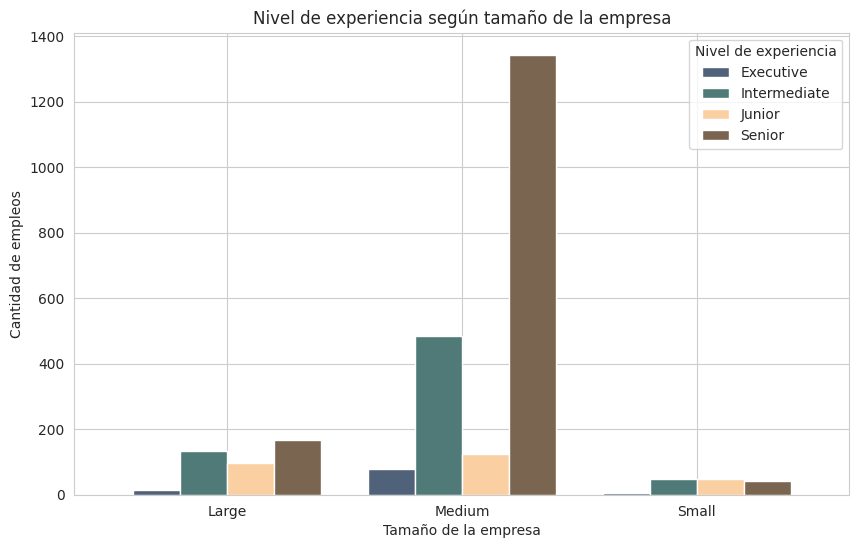

In [ ]:
exp_size = df.groupby(['company_size', 'experience_level']).size().unstack()

custom_colors = ["#50617A", "#507A78", "#FAD0A2", "#7A6650"]
ax = exp_size.plot(kind='bar', figsize=(10, 6), width=0.8, color=custom_colors)

plt.xlabel('Tamaño de la empresa')
plt.ylabel('Cantidad de empleos')
plt.title('Nivel de experiencia según tamaño de la empresa')
plt.legend(title='Nivel de experiencia')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


**Tenemos una fuerte presencia de empleados Senior en empresas de tamaño medio. Dato que me sorprendió. Esto contesta la primera de las preguntas planteadas (1 - ¿Como se comporta la experiencia de los empleado según el tamaño de la empresa?).**



<ipython-input-49-3347cbf9e110>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette=custom_colors, order=order_exp_levels)


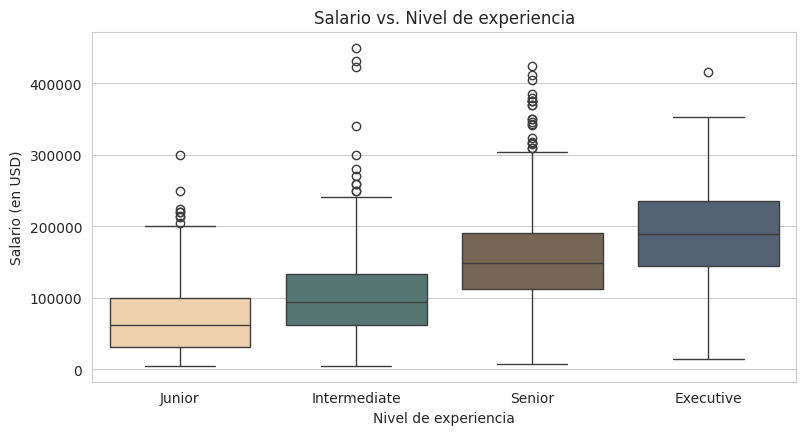

In [ ]:
plt.figure(figsize=(20, 10))
custom_colors = ["#FAD0A2", "#507A78", "#7A6650", "#50617A"]
order_exp_levels = ['Junior', 'Intermediate', 'Senior', 'Executive']
plt.subplot(2, 2, 1)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette=custom_colors, order=order_exp_levels)
plt.title('Salario vs. Nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario (en USD)')

plt.show()

**Tenemos muchos datos atípicos en los salarios según la experiencia.**

<ipython-input-50-36f678aa51b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette=colores_personalizados, order=order_exp_levels)


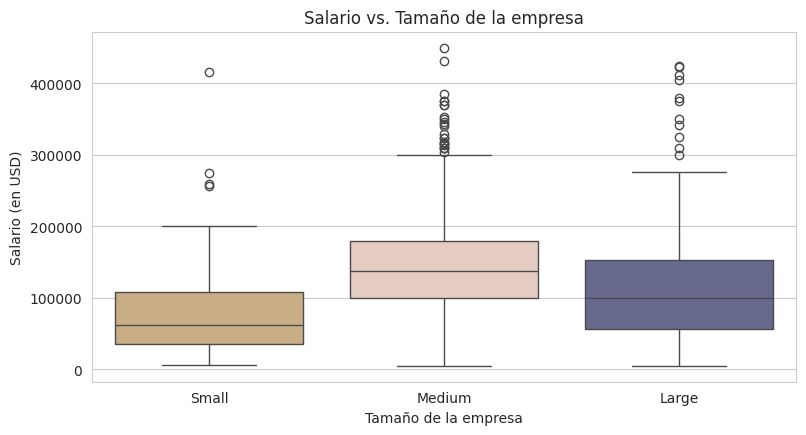

In [ ]:
colores_personalizados = ['#D4B07A', '#EBCABC', '#626593']
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
order_exp_levels = ['Small', 'Medium', 'Large']
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette=colores_personalizados, order=order_exp_levels)
plt.title('Salario vs. Tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario (en USD)')

plt.show()

**Tenemos muchos datos atípicos en los salarios según el tamaño de la empresa.**

<ipython-input-51-459009249e6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['remote_ratio'], y='salary_in_usd', data=df, palette=colores_personalizados)


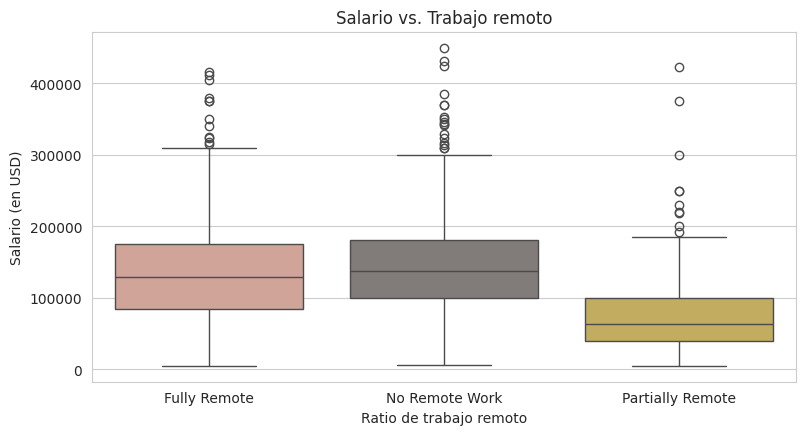

In [ ]:
colores_personalizados=['#D99E90', '#827A78', '#D1B550']
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
sns.boxplot(x=df['remote_ratio'], y='salary_in_usd', data=df, palette=colores_personalizados)
plt.title('Salario vs. Trabajo remoto')
plt.xlabel('Ratio de trabajo remoto')
plt.ylabel('Salario (en USD)')

plt.show()

**Tenemos muchos datos atípicos en los salarios según el ratio de trabajo remoto.**

In [ ]:
df.to_csv('/content/drive/MyDrive/Coder/Data Science/data_procesada.csv', index=False)

**Conclusiones**

**En principio resumiremos todo lo referido a las preguntas y al Análisis Exploratorio:**

*   Experiencia y Tamaño de la Empresa: La mayoría de las empresas pertenecen al segmento de tamaño medio. Cerca de dos tercios de los empleados en el mercado ocupan puestos Senior. La presencia de empleados Junior es significativamente menor, lo que podría ser preocupante. Existe una fuerte presencia de empleados Senior en empresas de tamaño medio, lo que indica una posible discrepancia en la proporción entre empresas y niveles de experiencia. Es un aspecto clave a considerar para equilibrar las oportunidades laborales.

*   Puestos principales en el Área: Los roles más destacados en el área son Data Engineer, Data
Science, Data Analyst y Machine Learning Engineer. Estos roles representan las tareas
fundamentales en el campo.
*   Evolución del Área en los Últimos Años: Se observa un incremento significativo en el número de
puestos de trabajo en los últimos dos años. Esta tendencia puede indicar una demanda
creciente en el mercado laboral del área, con más oportunidades de empleo. Los gráficos de
sueldos acumulados y promedios reflejan un aumento en la inversión en el área, especialmente
en los últimos dos años.
*   Ubicación de las Empresas: El crecimiento del área se sustenta principalmente en el mercado de América del Norte.
*   Ubicación de los Empleados: La mayoría de los empleados residen en América del Norte, lo que sugiere que la ubicación de la empresa y la residencia de los empleados están estrechamente alineadas.

**En conclusión, estos insights señalan la importancia de equilibrar la distribución de la experiencia laboral, considerar las oportunidades emergentes, y la relación entre la ubicación de las empresas y la residencia de los empleados. Estas observaciones pueden ser fundamentales para estrategias de contratación, inversión y expansión en el área.**


# **Modelos de Machine Learning**

**Transformamos etiquetas categóricas en valores numéricos**

In [ ]:
custom_mapping_experience_level	 = {
    'Junior': 0,
    'Intermediate': 1,
    'Senior': 2,
    'Executive': 3
}

custom_mapping_company_size= {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

In [ ]:
df['experience_level_cod'] = df['experience_level'].map(custom_mapping_experience_level)
df['company_size_cod'] = df['company_size'].map(custom_mapping_company_size)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_score,residence_continent,job_title_group,companyloc_continent,experience_level_cod,company_size_cod
id,,,,,,,,,,,,,,,
1,2023,Senior,Full-time,Principal Data Scientist,85847,ES,Fully Remote,ES,Large,Senior,Europe,Científico de Datos (Data Scientist) y Roles R...,Europe,2,2
2,2023,Intermediate,Contractual,ML Engineer,30000,US,Fully Remote,US,Small,Intermediate,North America,Ingeniería de Machine Learning,North America,1,0
3,2023,Intermediate,Contractual,ML Engineer,25500,US,Fully Remote,US,Small,Intermediate,North America,Ingeniería de Machine Learning,North America,1,0
4,2023,Senior,Full-time,Data Scientist,175000,CA,Fully Remote,CA,Medium,Senior,North America,Científico de Datos (Data Scientist) y Roles R...,North America,2,1
5,2023,Senior,Full-time,Data Scientist,120000,CA,Fully Remote,CA,Medium,Senior,North America,Científico de Datos (Data Scientist) y Roles R...,North America,2,1


In [ ]:
df=pd.get_dummies(df, columns=[ 'remote_ratio', 'companyloc_continent', 'employment_type', 'job_title_group'], drop_first=True)

In [ ]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,experience_score,residence_continent,experience_level_cod,...,companyloc_continent_Australia,companyloc_continent_Europe,companyloc_continent_North America,companyloc_continent_South America,employment_type_Freelancer,employment_type_Full-time,employment_type_Part-time,job_title_group_Gestión y Estrategia de Datos,job_title_group_Ingeniería de Datos y Desarrollo,job_title_group_Ingeniería de Machine Learning
id,,,,,,,,,,,,,,,,,,,,,
1,2023,Senior,Principal Data Scientist,85847,ES,ES,Large,Senior,Europe,2,...,0,1,0,0,0,1,0,0,0,0
2,2023,Intermediate,ML Engineer,30000,US,US,Small,Intermediate,North America,1,...,0,0,1,0,0,0,0,0,0,1
3,2023,Intermediate,ML Engineer,25500,US,US,Small,Intermediate,North America,1,...,0,0,1,0,0,0,0,0,0,1
4,2023,Senior,Data Scientist,175000,CA,CA,Medium,Senior,North America,2,...,0,0,1,0,0,1,0,0,0,0
5,2023,Senior,Data Scientist,120000,CA,CA,Medium,Senior,North America,2,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 1 to 3755
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   work_year                                         2584 non-null   int64 
 1   experience_level                                  2584 non-null   object
 2   job_title                                         2584 non-null   object
 3   salary_in_usd                                     2584 non-null   int64 
 4   employee_residence                                2584 non-null   object
 5   company_location                                  2584 non-null   object
 6   company_size                                      2584 non-null   object
 7   experience_score                                  2584 non-null   object
 8   residence_continent                               2584 non-null   object
 9   experience_level_cod          

**Confirmamos que trasformamos todas los datos correctamente y no tenemos NAN**




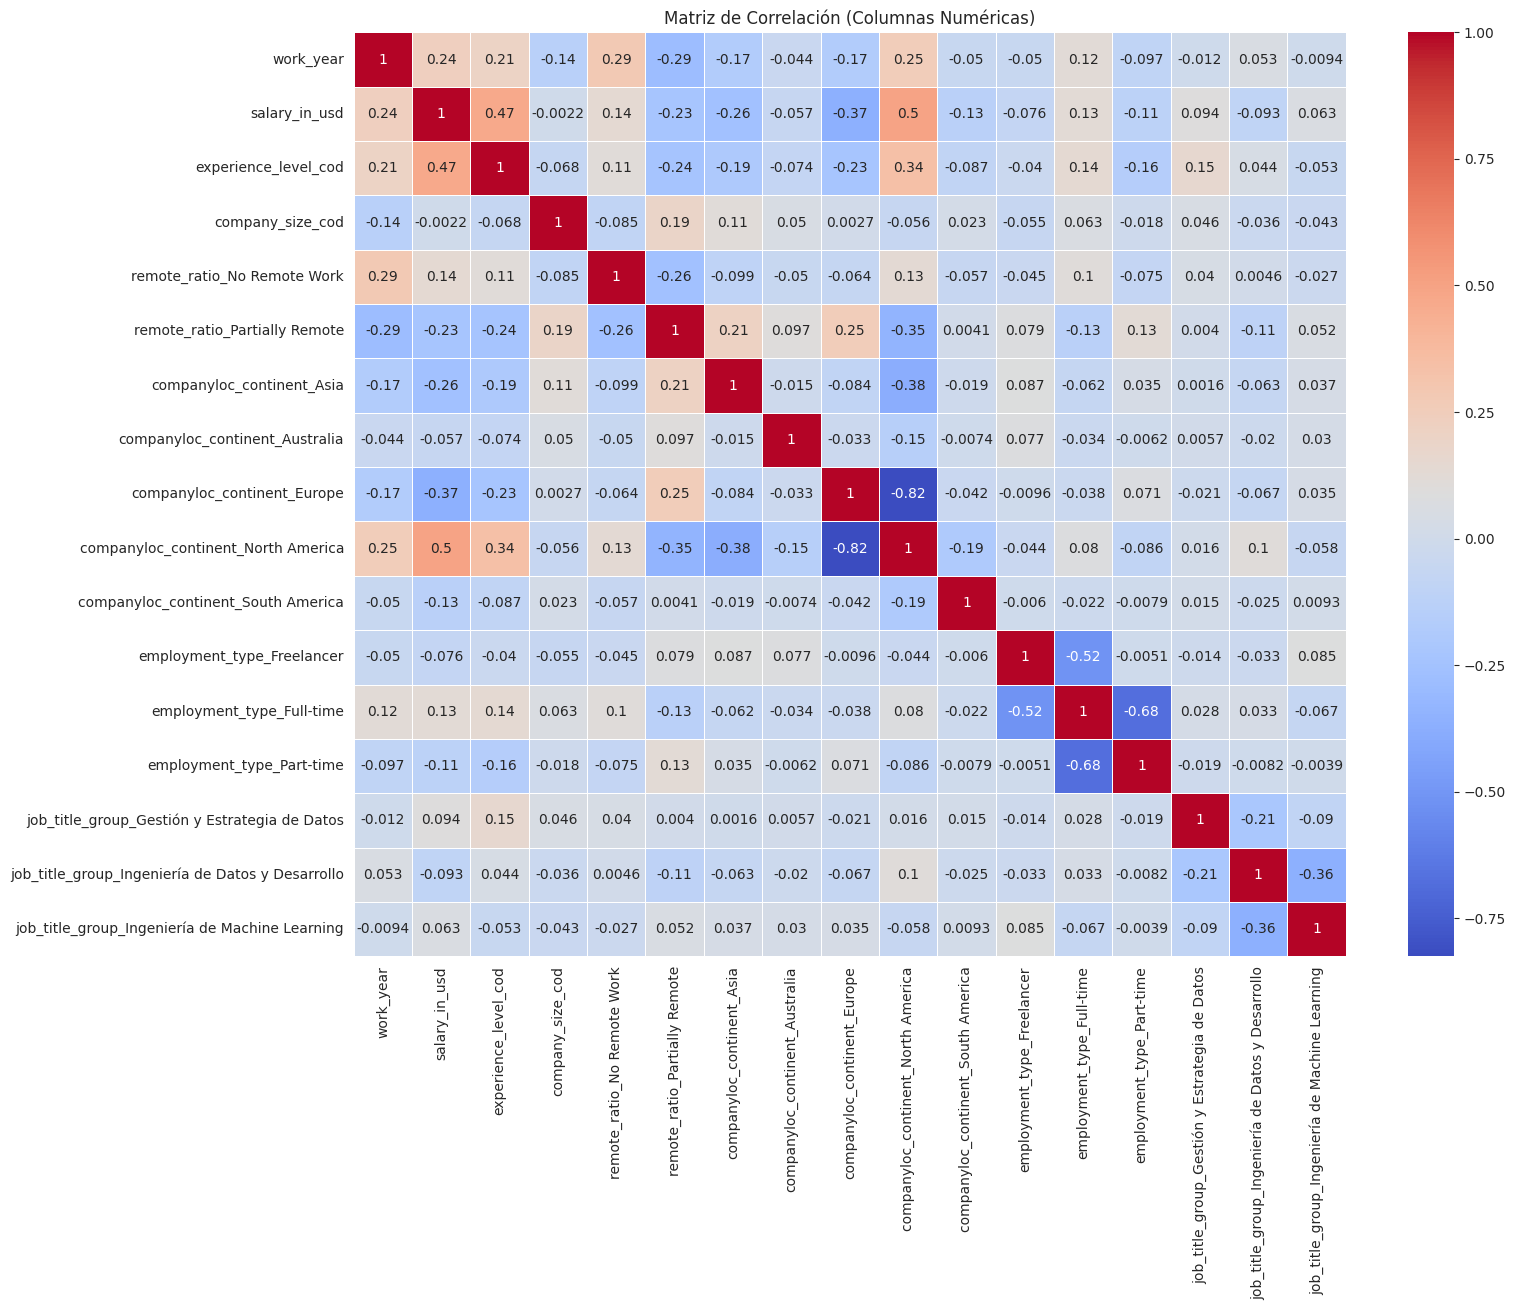

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Columnas Numéricas)')
plt.show()

**Las correlacciones son muy bajas en general, salvo por 'companyloc_continent_North America', 'employment_type_Freelancer' y 'employment_type_Part-time.**



---



---



El análisis implicará el uso de técnicas estadísticas del tipo supervidadas, en este caso la variable dependiente es categórica. Evaluaremos la relación entre cada uno de estos factores independientes para poder predecir el nivel de experiancia del trabajador.

In [ ]:
df.head()


,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,experience_score,residence_continent,experience_level_cod,...,companyloc_continent_Australia,companyloc_continent_Europe,companyloc_continent_North America,companyloc_continent_South America,employment_type_Freelancer,employment_type_Full-time,employment_type_Part-time,job_title_group_Gestión y Estrategia de Datos,job_title_group_Ingeniería de Datos y Desarrollo,job_title_group_Ingeniería de Machine Learning
id,,,,,,,,,,,,,,,,,,,,,
1,2023,Senior,Principal Data Scientist,85847,ES,ES,Large,Senior,Europe,2,...,0,1,0,0,0,1,0,0,0,0
2,2023,Intermediate,ML Engineer,30000,US,US,Small,Intermediate,North America,1,...,0,0,1,0,0,0,0,0,0,1
3,2023,Intermediate,ML Engineer,25500,US,US,Small,Intermediate,North America,1,...,0,0,1,0,0,0,0,0,0,1
4,2023,Senior,Data Scientist,175000,CA,CA,Medium,Senior,North America,2,...,0,0,1,0,0,1,0,0,0,0
5,2023,Senior,Data Scientist,120000,CA,CA,Medium,Senior,North America,2,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Elimino todas las columnas que no voy a usar y armo un Df nuevo para trabajar
columnas_a_eliminar_3 = ['job_title', 'employee_residence', 'company_location', 'company_size', 'experience_score', 'residence_continent', 'experience_level']
df_cod2 = df.drop(columnas_a_eliminar_3, axis=1)

In [ ]:
df_cod2

,work_year,salary_in_usd,experience_level_cod,company_size_cod,remote_ratio_No Remote Work,remote_ratio_Partially Remote,companyloc_continent_Asia,companyloc_continent_Australia,companyloc_continent_Europe,companyloc_continent_North America,companyloc_continent_South America,employment_type_Freelancer,employment_type_Full-time,employment_type_Part-time,job_title_group_Gestión y Estrategia de Datos,job_title_group_Ingeniería de Datos y Desarrollo,job_title_group_Ingeniería de Machine Learning
id,,,,,,,,,,,,,,,,,
1,2023,85847,2,2,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2023,30000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2023,25500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2023,175000,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0
5,2023,120000,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,2020,412000,2,2,0,0,0,0,0,1,0,0,1,0,0,0,0
3752,2021,151000,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0
3753,2020,105000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
df_cod2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 1 to 3755
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   work_year                                         2584 non-null   int64
 1   salary_in_usd                                     2584 non-null   int64
 2   experience_level_cod                              2584 non-null   int64
 3   company_size_cod                                  2584 non-null   int64
 4   remote_ratio_No Remote Work                       2584 non-null   uint8
 5   remote_ratio_Partially Remote                     2584 non-null   uint8
 6   companyloc_continent_Asia                         2584 non-null   uint8
 7   companyloc_continent_Australia                    2584 non-null   uint8
 8   companyloc_continent_Europe                       2584 non-null   uint8
 9   companyloc_continent_North America       

In [ ]:
X = df_cod2.drop("company_size_cod", axis=1)
y = df_cod2['company_size_cod']

In [ ]:
X

,work_year,salary_in_usd,experience_level_cod,remote_ratio_No Remote Work,remote_ratio_Partially Remote,companyloc_continent_Asia,companyloc_continent_Australia,companyloc_continent_Europe,companyloc_continent_North America,companyloc_continent_South America,employment_type_Freelancer,employment_type_Full-time,employment_type_Part-time,job_title_group_Gestión y Estrategia de Datos,job_title_group_Ingeniería de Datos y Desarrollo,job_title_group_Ingeniería de Machine Learning
id,,,,,,,,,,,,,,,,
1,2023,85847,2,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2023,30000,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2023,25500,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2023,175000,2,0,0,0,0,0,1,0,0,1,0,0,0,0
5,2023,120000,2,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,2020,412000,2,0,0,0,0,0,1,0,0,1,0,0,0,0
3752,2021,151000,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3753,2020,105000,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
y

id
1       2
2       0
3       0
4       1
5       1
       ..
3751    2
3752    2
3753    0
3754    2
3755    2
Name: company_size_cod, Length: 2584, dtype: int64



---



---



**PCA + RandomForestClassifier**

In [ ]:
#Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Validación simple
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#Reducción de dimensionaidad utilizando PCA

pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#Definir modelo
clf = RandomForestClassifier(random_state=42)
#Entrenamos el modelo
clf.fit(X_train_pca, y_train)
#Realizamos las predicciones utilizando el modelo
y_pred = clf.predict(X_test_pca)


In [ ]:
# Classification Report for Training Set
y_train_pred = clf.predict(X_train_pca)
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       123
           1       0.98      1.00      0.99      1615
           2       0.99      0.93      0.96       329

    accuracy                           0.99      2067
   macro avg       0.99      0.96      0.98      2067
weighted avg       0.99      0.99      0.99      2067


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        24
           1       0.89      0.90      0.90       413
           2       0.49      0.50      0.50        80

    accuracy                           0.81       517
   macro avg       0.61      0.59      0.60       517
weighted avg       0.81      0.81      0.81       517



In [ ]:
# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [400, 1000, 1500],
    'max_depth': [10, 20, 30]
}

# Crear el clasificador RandomForest
clf = RandomForestClassifier(random_state=42)

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Obtener el mejor modelo
best_clf = grid_search.best_estimator_

# Imprimir los mejores parámetros
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 400}


In [ ]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación simple
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir modelo con los mejores parámetros
best_clf = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
best_clf.fit(X_train_pca, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_clf.predict(X_test_pca)

# Classification Report for Training Set
y_train_pred = best_clf.predict(X_train_pca)
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       123
           1       0.94      1.00      0.97      1615
           2       0.99      0.73      0.84       329

    accuracy                           0.94      2067
   macro avg       0.97      0.85      0.90      2067
weighted avg       0.95      0.94      0.94      2067


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.46      0.25      0.32        24
           1       0.89      0.93      0.91       413
           2       0.54      0.47      0.51        80

    accuracy                           0.83       517
   macro avg       0.63      0.55      0.58       517
weighted avg       0.81      0.83      0.82       517



**Destaca como el modelo con el rendimiento más sólido, logrando una impresionante precisión del 94% en entrenamiento y un sólido 83% en prueba. Su capacidad para capturar patrones complejos y generalizar bien a nuevas instancias lo posiciona como un candidato fuerte para la toma de decisiones estratégicas. Sin embargo, la advertencia sobre la posibilidad de sobreajuste subraya la importancia de la monitorización continua.**





---



**Xgboost**

In [ ]:
#Paso 2: Hacemos la validación simple haciendo el split de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
#Paso 3; Creamos el modelo y hacemos el ajuste
clf_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)
clf_xgb.fit(X_train, y_train)
#Predicciones de entrenamiento y prueba
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test
# Informe para el conjunto de entrenamiento
report_train = classification_report(y_train, y_train_pred)
print("Informe de Clasificación para el Conjunto de Entrenamiento:\n", report_train)

# Informe para el conjunto de prueba
report_test = classification_report(y_test, y_test_pred )
print("\nInforme de Clasificación para el Conjunto de Prueba:\n", report_test)

Informe de Clasificación para el Conjunto de Entrenamiento:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78       123
           1       0.93      0.98      0.95      1615
           2       0.84      0.68      0.76       329

    accuracy                           0.92      2067
   macro avg       0.90      0.78      0.83      2067
weighted avg       0.91      0.92      0.91      2067


Informe de Clasificación para el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29        24
           1       0.89      0.93      0.91       413
           2       0.55      0.45      0.50        80

    accuracy                           0.83       517
   macro avg       0.59      0.54      0.56       517
weighted avg       0.81      0.83      0.82       517



In [ ]:
# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Crear el clasificador RandomForest
clf = RandomForestClassifier(random_state=42)

# Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Obtener el mejor modelo
best_clf = grid_search.best_estimator_

# Imprimir los mejores parámetros
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


**También presenta resultados robustos con un 92% de precisión en entrenamiento y 83% en prueba. Su capacidad para manejar relaciones no lineales y resistir al sobreajuste lo coloca como una opción consistente para la consultora.**






---



**Ejemplo red neuronal**

In [ ]:
# Paso 2: Hacemos validación simple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Normalizar utilizando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 4: Crear la base de nuestra red neuronal
model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu'))  # Ajustar input_dim a 16
model.add(Dense(4, activation='softmax'))  # Cambiar a 4 neuronas para manejar 4 clases

# Paso 5: Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Paso 6: Hacemos el entrenamiento del modelo
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1, verbose=1)

# Predicciones en conjunto de prueba y entrenamiento
y_train_pred_prob = model.predict(X_train)
y_test_pred_prob = model.predict(X_test)

# Convertir las probabilidades a clases usando argmax
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Classification Report para el conjunto de entrenamiento
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Classification Report para el conjunto de prueba
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Epoch 1/50
372/372 [==============================] - 2s 3ms/step - loss: 0.7977 - accuracy: 0.7065 - val_loss: 0.6128 - val_accuracy: 0.7826
Epoch 2/50
372/372 [==============================] - 1s 2ms/step - loss: 0.5315 - accuracy: 0.8038 - val_loss: 0.5547 - val_accuracy: 0.7874
Epoch 3/50
372/372 [==============================] - 1s 2ms/step - loss: 0.4982 - accuracy: 0.8199 - val_loss: 0.5369 - val_accuracy: 0.8068
Epoch 4/50
372/372 [==============================] - 1s 2ms/step - loss: 0.4839 - accuracy: 0.8177 - val_loss: 0.5261 - val_accuracy: 0.8068
Epoch 5/50
372/372 [==============================] - 1s 2ms/step - loss: 0.4760 - accuracy: 0.8247 - val_loss: 0.5174 - val_accuracy: 0.8116
Epoch 6/50
372/372 [==============================] - 1s 2ms/step - loss: 0.4690 - accuracy: 0.8258 - val_loss: 0.5101 - val_accuracy: 0.8116
Epoch 7/50
372/372 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.8301 - val_loss: 0.5037 - val_accuracy: 0.8116
Epoch 

**Aunque ligeramente menos preciso, con una precisión del 85% en entrenamiento y 84% en prueba, su capacidad de generalización y aprendizaje de patrones complejos sigue siendo sólida.**



---



**LightGBM**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el conjunto de datos de entrenamiento y prueba de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Definir los parámetros del modelo
params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10
}

# Número de rondas de entrenamiento
num_round = 100

# Entrenar el modelo
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred_prob = bst.predict(X_train, num_iteration=bst.best_iteration)
y_train_pred_class = [list(x).index(max(x)) for x in y_train_pred_prob]

y_test_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_test_pred_class = [list(x).index(max(x)) for x in y_test_pred_prob]

# Imprimir el informe de clasificación para el conjunto de entrenamiento
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_class))

# Imprimir el informe de clasificación para el conjunto de prueba
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_class))

# Calcular y imprimir la precisión para el conjunto de prueba
accuracy = accuracy_score(y_test, y_test_pred_class)
print(f"\nAccuracy: {accuracy:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -2.821669
[LightGBM] [Info] Start training from score -0.246763
[LightGBM] [Info] Start training from score -1.837796
[LightGBM] [Info] Start training from score -34.538776
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	valid_0's multi_logloss: 0.421941
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.77      0.22      0.3

**Ofrece resultados competitivos con una precisión del 86% en entrenamiento y 83% en prueba. Su eficiencia computacional y manejo de grandes conjuntos de datos son destacables, considerando la velocidad de entrenamiento como un factor clave en aplicaciones prácticas.**



---



---




**Feature selection**

En este sección aplicaremos los mismo algoritmos pero con el solo las variables seleccionadas.

Forward selection (Seleccion hacia adelante)

In [ ]:
sfs_forward = SFS(LinearRegression(),
                  k_features= 'best',
                  forward=True, #
                  floating=False,
                  scoring='r2',
                  cv=5)

sfs_forward.fit(X, y)

selected_features_forward = sfs_forward.k_feature_names_
print("Features seleccionadas:", selected_features_forward)

Features seleccionadas: ('work_year', 'remote_ratio_Partially Remote', 'companyloc_continent_Asia', 'companyloc_continent_Australia', 'companyloc_continent_South America', 'employment_type_Freelancer', 'employment_type_Full-time', 'job_title_group_Ingeniería de Datos y Desarrollo')


Backward elimination (Eliminación hacia atrás)

In [ ]:
sfs_backward = SequentialFeatureSelector(estimator=LinearRegression(),
                                         k_features= 'best',
                                         forward=False,
                                         floating=False,
                                         scoring='r2',
                                         cv= 5)

sfs_backward.fit(X, y)

selected_features_backward = sfs_backward.k_feature_names_

print("Características con método de selección hacia atrás:",selected_features_backward )

Características con método de selección hacia atrás: ('work_year', 'remote_ratio_Partially Remote', 'companyloc_continent_Asia', 'companyloc_continent_Australia', 'companyloc_continent_South America', 'employment_type_Freelancer', 'employment_type_Full-time', 'job_title_group_Ingeniería de Datos y Desarrollo')


Eliminación bidireccional (stepwise)

In [ ]:
sfs_stepwise = SequentialFeatureSelector(estimator=LinearRegression(),
                                         k_features= 'best',
                                         forward=True,
                                         floating=True,
                                         scoring='r2',
                                         cv= 5)


sfs_stepwise.fit(X, y)

selected_features_stepwise = sfs_stepwise.k_feature_names_

print("Características obtenidas por stpewise:", selected_features_stepwise )

Características obtenidas por stpewise: ('work_year', 'remote_ratio_Partially Remote', 'companyloc_continent_Asia', 'companyloc_continent_Australia', 'companyloc_continent_South America', 'employment_type_Freelancer', 'employment_type_Full-time', 'job_title_group_Ingeniería de Datos y Desarrollo')


En los 3 métodos me dieron las mismas columnas ('salary_in_usd', 'remote_ratio_Partially Remote', 'companyloc_continent_Europe', 'companyloc_continent_North America', 'employment_type_Part-time', 'job_title_group_Gestión y Estrategia de Datos', 'job_title_group_Ingeniería de Datos y Desarrollo')

In [ ]:
X = df_cod2[['work_year', 'remote_ratio_Partially Remote', 'companyloc_continent_Asia', 'companyloc_continent_Australia', 'companyloc_continent_South America', 'employment_type_Freelancer', 'employment_type_Full-time', 'job_title_group_Ingeniería de Datos y Desarrollo']]
y = df_cod2['company_size_cod']



---



**PCA + RandomForestClassifier**

In [ ]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación simple
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir modelo con los mejores parámetros
best_clf = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
best_clf.fit(X_train_pca, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_clf.predict(X_test_pca)

# Classification Report for Training Set
y_train_pred = best_clf.predict(X_train_pca)
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Classification Report for Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.53      0.20      0.29       123
           1       0.89      0.96      0.92      1615
           2       0.61      0.51      0.56       329

    accuracy                           0.84      2067
   macro avg       0.68      0.56      0.59      2067
weighted avg       0.82      0.84      0.83      2067


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        24
           1       0.90      0.94      0.92       413
           2       0.51      0.44      0.47        80

    accuracy                           0.83       517
   macro avg       0.57      0.53      0.54       517
weighted avg       0.81      0.83      0.82       517



**A pesar de una ligera disminución en la precisión, demuestra ser un modelo robusto con una precisión del 84% en entrenamiento y 83% en prueba. La mejora en la capacidad de generalización sugiere que la Feature Selection puede ser beneficiosa.**



---



**Xgboost**

In [ ]:
#Paso 2: Hacemos la validación simple haciendo el split de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
#Paso 3; Creamos el modelo y hacemos el ajuste
clf_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)
clf_xgb.fit(X_train, y_train)
#Predicciones de entrenamiento y prueba
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test
# Informe para el conjunto de entrenamiento
report_train = classification_report(y_train, y_train_pred)
print("Informe de Clasificación para el Conjunto de Entrenamiento:\n", report_train)

# Informe para el conjunto de prueba
report_test = classification_report(y_test, y_test_pred )
print("\nInforme de Clasificación para el Conjunto de Prueba:\n", report_test)

Informe de Clasificación para el Conjunto de Entrenamiento:
               precision    recall  f1-score   support

           0       0.44      0.10      0.16       123
           1       0.89      0.96      0.92      1615
           2       0.59      0.53      0.56       329

    accuracy                           0.84      2067
   macro avg       0.64      0.53      0.55      2067
weighted avg       0.81      0.84      0.82      2067


Informe de Clasificación para el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.36      0.21      0.26        24
           1       0.90      0.93      0.92       413
           2       0.55      0.50      0.52        80

    accuracy                           0.83       517
   macro avg       0.60      0.55      0.57       517
weighted avg       0.82      0.83      0.82       517



**Mantiene una precisión estable del 84% en entrenamiento y prueba, indicando una capacidad efectiva para capturar información relevante incluso con un conjunto reducido de características.**



---



**LightGBM**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el conjunto de datos de entrenamiento y prueba de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Definir los parámetros del modelo
params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10
}

# Número de rondas de entrenamiento
num_round = 100

# Entrenar el modelo
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred_prob = bst.predict(X_train, num_iteration=bst.best_iteration)
y_train_pred_class = [list(x).index(max(x)) for x in y_train_pred_prob]

y_test_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_test_pred_class = [list(x).index(max(x)) for x in y_test_pred_prob]

# Imprimir el informe de clasificación para el conjunto de entrenamiento
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_class))

# Imprimir el informe de clasificación para el conjunto de prueba
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_class))

# Calcular y imprimir la precisión para el conjunto de prueba
accuracy = accuracy_score(y_test, y_test_pred_class)
print(f"\nAccuracy: {accuracy:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 2067, number of used features: 6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -2.821669
[LightGBM] [Info] Start training from score -0.246763
[LightGBM] [Info] Start training from score -1.837796
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve fo

**Experimenta una mejora en la precisión del conjunto de prueba al 85%, destacando su capacidad para adaptarse y generalizar eficientemente con la atención selectiva a las característica**



---



---



---



# **Conclusion general**

**Después de exhaustivos análisis y evaluaciones, la recomendación final se inclina hacia el modelo PCA + Random Forest sin Feature Selection, evidenciando una impresionante precisión del 94% en entrenamiento y un sólido 83% en prueba. Este modelo destaca por su habilidad para capturar patrones complejos y generalizar eficientemente en datos no vistos, consolidándose como una herramienta valiosa para la toma de decisiones estratégicas.**
**No obstante, es crucial destacar que LightGBM con Feature Selection presenta una mejora significativa, pasando del 83% al 85% en el conjunto de prueba. Esta mejora sugiere que, a pesar de la ligera disminución en la precisión, LightGBM se revela como un modelo más estable en términos de sobreajuste en comparación con PCA + Random Forest.**
**En este sentido, la decisión final se torna contextual y debe ajustarse según las necesidades específicas de la consultora. Si bien PCA + Random Forest destaca por su precisión, se recomienda considerar la estabilidad de LightGBM frente al sobreajuste. Monitorear continuamente estos modelos permitirá adaptar estrategias de manera más ágil, garantizando que la herramienta seleccionada no solo sea precisa sino también resistente a posibles problemas de generalización excesiva.**
**Con estas recomendaciones en mente, avanzamos hacia la toma de decisiones informadas y la optimización continua, asegurándonos de que nuestro enfoque en el tamaño de la empresa en Data Science sea eficaz y adaptable a medida que evolucionamos en nuestro viaje empresarial.**